In [16]:
%matplotlib inline
import re
import io
import os
import urllib2
import networkx as nx
import community
import json
import glob
import numpy as np
import operator
import matplotlib.pyplot as plt
from matplotlib import pyplot
import math
import time
import networkx as nx
import os.path
from pymongo import MongoClient
from itertools import groupby
from __future__ import division
from pprint import pprint
from os import listdir

In [2]:
def getJSONReply(URL):
    response = urllib2.urlopen(URL);
    html = response.read();
    data = json.loads(html);
    return data;


def getUserInput():
    FileExists=os.path.isfile('RitoMongo.conf') ;
    res=[];
    if (FileExists):
        with open('RitoMongo.conf') as f:
            for line in f:
                res.append(line.rstrip('\n'));
                print line.rstrip('\n');
    elif (not FileExists):
        SummonerName= raw_input('Enter your Summoner name: ');
        Region  = (raw_input('Enter your region: ')).upper();
        Key = raw_input('Enter your API Key which you retrieved from Riot website: ');
        f = open('RitoMongo.conf','w');
        f.write(SummonerName+'\n'+Region+'\n'+Key);
        f.close();
    return res;

      
def getRecentHistory(SummonerID):
        rURL= "https://" +Region.lower()+ ".api.pvp.net/api/lol/" + Region.lower()+ "/v1.3/game/by-summoner/" + `SummonerID`+ "/recent?api_key=" + Key;
        #print rURL;
        r_data=getJSONReply(rURL);
        #print r_data;
        r_data['_id']=r_data['summonerId'];
        r_data.pop('summonerId');
        with io.open('RecentHistory/%s.json' % str(SummonerID), 'w', encoding='utf-8') as f:
            f.write(unicode(json.dumps(r_data, ensure_ascii=False)))
        return r_data;

def getMatchlist(SummonerID):
        rURL= "https://" +Region.lower()+ ".api.pvp.net/api/lol/" + Region.lower()+ "/v2.2/matchlist/by-summoner/" + `SummonerID`+ "/?api_key=" + Key
        r_data=getJSONReply(rURL);
        return r_data

def getMatch(MatchID):
        rURL= "https://" +Region.lower()+ ".api.pvp.net/api/lol/" + Region.lower()+ "/v2.2/match/" + `MatchID`+ "/?api_key=" + Key
        r_data=getJSONReply(rURL);
        with io.open('Match/%s.json' % str(MatchID), 'w', encoding='utf-8') as f:
             f.write(unicode(json.dumps(r_data, ensure_ascii=False)))
        return r_data 

def getChampion(SummonerID):
        rURL= "https://" +Region.lower()+ ".api.pvp.net/championmastery/location/" + Region+ "1/player/" + `SummonerID`+ "/champions?api_key=" + Key
        r_data=getJSONReply(rURL);
        with io.open('Champion/%s.json' % str(SummonerID), 'w', encoding='utf-8') as f:
             f.write(unicode(json.dumps(r_data, ensure_ascii=False)))
        return r_data 
    
def ReformatJSON(SummonerName,Region,Key):
    idURL = "https://" +Region.lower()+ ".api.pvp.net/api/lol/" +Region.lower()+ "/v1.4/summoner/by-name/" + SummonerName+ "?api_key=" + Key
    id_data = getJSONReply(idURL);
    idRes=id_data[SummonerName.lower()];
    idRes['_id'] = idRes['id'];
    idRes.pop('id');
    return idRes,id_data;

def ReformatJSONbyid(SummonerID,Region,Key):
    idURL = "https://" +Region.lower()+ ".api.pvp.net/api/lol/" +Region.lower()+ "/v1.4/summoner/" +SummonerID+ "?api_key=" +Key
    id_data = getJSONReply(idURL);
    idRes=id_data[SummonerID];
    idRes['_id'] = idRes['id'];
    idRes.pop('id');
    with io.open('Summoner/%s.json' % str(SummonerID), 'w', encoding='utf-8') as f:
          f.write(unicode(json.dumps(idRes, ensure_ascii=False)))
    return idRes,id_data;

In [85]:
URL = "https://euw.api.pvp.net/api/lol/euw/v1.2/champion?api_key=RGAPI-20253dda-c325-4a7e-947a-d283af4f8641"
data = getJSONReply(URL);

with open('Champions.json', 'w') as f:
    f.write(unicode(json.dumps(data, ensure_ascii=False)))

In [17]:
filename = listdir("RecentHistory")[1:]

In [91]:
champions = []
for i in range(len(data["champions"])):
    champions.append(data["champions"][i]["id"])
print champions

[266, 103, 84, 12, 32, 34, 1, 22, 136, 268, 432, 53, 63, 201, 51, 69, 31, 42, 122, 131, 119, 36, 245, 60, 28, 81, 9, 114, 105, 3, 41, 86, 150, 79, 104, 120, 74, 420, 39, 427, 40, 59, 24, 126, 202, 222, 429, 43, 30, 38, 55, 10, 85, 121, 203, 240, 96, 7, 64, 89, 127, 236, 117, 99, 54, 90, 57, 11, 21, 62, 82, 25, 267, 75, 111, 76, 56, 20, 2, 61, 80, 78, 133, 33, 421, 58, 107, 92, 68, 13, 113, 35, 98, 102, 27, 14, 15, 72, 37, 16, 50, 134, 223, 163, 91, 44, 17, 412, 18, 48, 23, 4, 29, 77, 6, 110, 67, 45, 161, 254, 112, 8, 106, 19, 101, 5, 157, 83, 154, 238, 115, 26, 143]


In [19]:
# Get all the champions that are used in the first 2000 players' recent games
championid = []
for k in range(2000):
    with open('RecentHistory/%s' % filename[k]) as f:
        data = json.load(f)
    for i in range(len(data["games"])):
        championid.append(data["games"][i]["championId"])
        if "fellowPlayers" not in data["games"][i].keys():
            continue
        for j in range(len(data["games"][i]["fellowPlayers"])):
            championid.append(data["games"][i]["fellowPlayers"][j]["championId"])

In [92]:
print len(set(championid))

133


In [94]:
# Initialize 3 lists with value 0, to store the win-rate, 
# win times and total used times of each champion
win_rate = [0]*(len(champions))
win = [0]*(len(champions))
total = [0]*(len(champions))

for k in range(2000):
    # Load each summoner's data by reading the local file
    with open('RecentHistory/%s' % filename[k]) as f:
        data = json.load(f)
        
    for i in range(len(data["games"])):
        # Get the champion id of the summoner in each game
        champid = data["games"][i]["championId"]
        # Find the index of the champion in the champions list, 
        # add 1 to the total use frequency of this champion
        total[champions.index(champid)] += 1
        
        # Find the index of the champion in the champions list, 
        # if the summoner wins this game,
        # add 1 to the total win frequency of this champion
        if data["games"][i]["stats"]["win"] is True:
                win[champions.index(champid)] += 1
        # In some games the summoner doesn't have fellow players
        if "fellowPlayers" not in data["games"][i].keys():
                continue
        
        # Get the champion id of the fellow players in each game
        for j in range(len(data["games"][i]["fellowPlayers"])):
            champid = data["games"][i]["fellowPlayers"][j]["championId"]
            total[champions.index(champid)] += 1
            if data["games"][i]["stats"]["win"] is True:
                win[champions.index(champid)] += 1

# Calculate the win-rate of each champion
for i in range(len(champions)):
    if total[i] == 0:
        win_rate[i] = 0
    else:
        win_rate[i] = win[i]/total[i]
        
print win_rate

[0.5296052631578947, 0.5183374083129584, 0.5652173913043478, 0.5242718446601942, 0.5542056074766355, 0.5315315315315315, 0.5168350168350169, 0.5303274288781535, 0.5109170305676856, 0.544954128440367, 0.5112391930835735, 0.5272899857617466, 0.5365535248041775, 0.539340954942838, 0.5262710061689002, 0.5284738041002278, 0.5437853107344632, 0.5334665334665335, 0.5223983459682977, 0.5415584415584416, 0.5364485981308411, 0.5359195402298851, 0.5261437908496732, 0.5313207547169811, 0.5230439442658092, 0.5343001841620626, 0.5281207133058985, 0.5221386800334169, 0.5387533875338754, 0.5020746887966805, 0.5102548166563082, 0.5181159420289855, 0.5484949832775919, 0.5243741765480896, 0.5405405405405406, 0.5229040622299049, 0.5191986644407346, 0.5005512679162073, 0.5434103685196752, 0.5419407894736842, 0.5351299326275265, 0.538540596094553, 0.5088702147525677, 0.5370086778968862, 0.5356195141865687, 0.528906955736224, 0.5360824742268041, 0.5254348539547096, 0.4985875706214689, 0.5127840909090909, 0.5

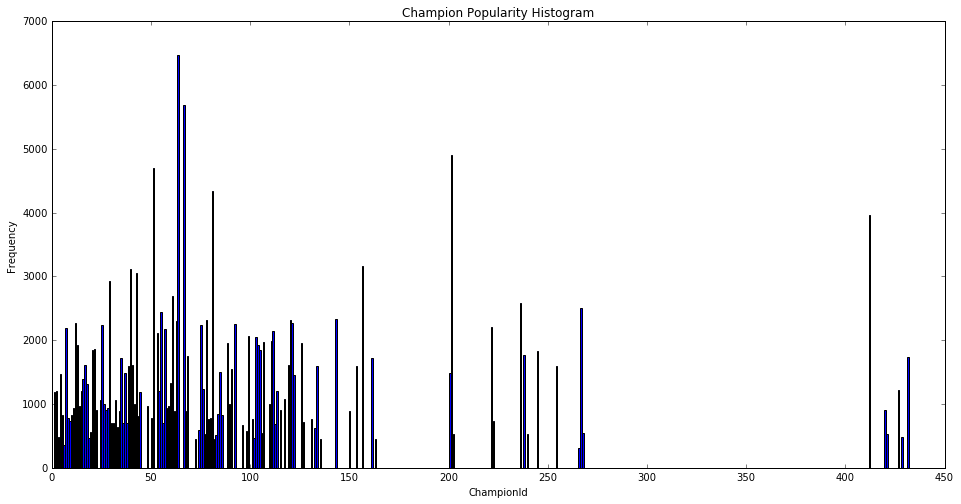

In [83]:
numbers = championid
dmax=max(championid)
dmin=min(championid)
# Create the histogram and plot it
plt.figure(figsize=(16,8))
hist, bins = np.histogram(championid, bins=450)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)

plt.title("Champion Popularity Histogram")
plt.xlabel("ChampionId")
plt.ylabel("Frequency")
plt.show()

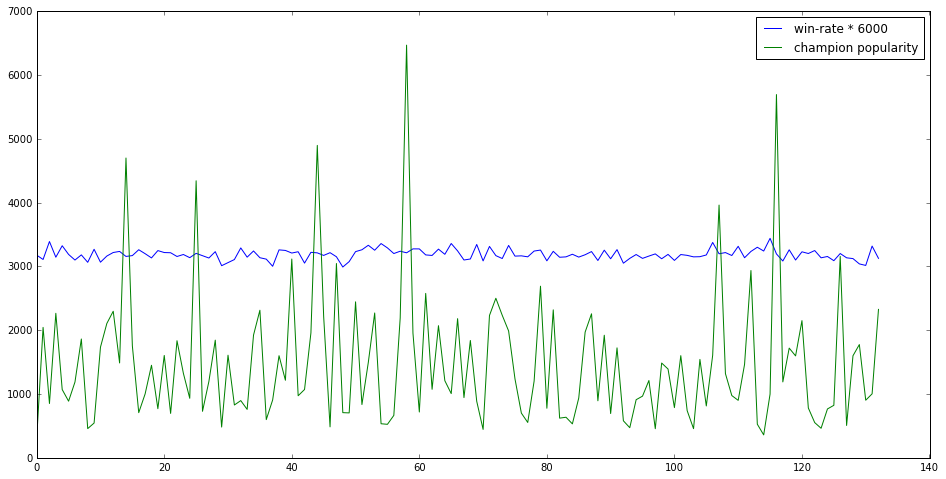

In [114]:
plt.figure(figsize=(16,8))
plt.plot(range(len(champions)), [i*6000 for i in win_rate], label = "win-rate * 6000")
plt.plot(range(len(champions)), total, label = "champion popularity")
plt.legend()
plt.show()

In [112]:
np.corrcoef(win_rate,total)

array([[ 1.        ,  0.10295501],
       [ 0.10295501,  1.        ]])

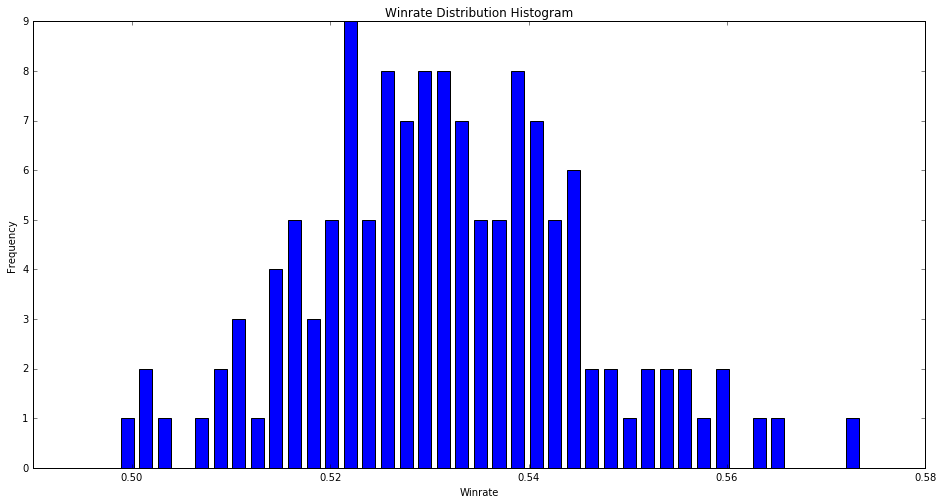

In [116]:
numbers = win_rate
dmax=max(win_rate)
dmin=min(win_rate)
plt.figure(figsize=(16,8))
#Create the histogram and plot it
hist, bins = np.histogram(numbers, bins=40)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("Winrate Distribution Histogram")
plt.xlabel("Winrate")
plt.ylabel("Frequency")
plt.show()

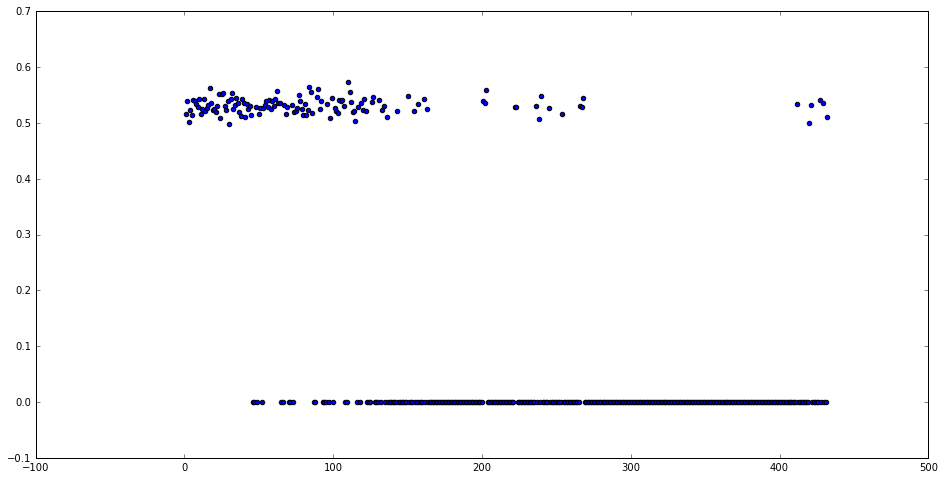

In [80]:
plt.figure(figsize=(16,8))
plt.scatter(range(1,max(championid)+1), win_rate)
plt.show()